## Protein Embeddings Manipulation

In [1]:
from pathlib import Path

data_path = Path("data") 

!ls $data_path

embeddings_fireprot.pkl  fireprotdb_results.csv  stability_fireprot.h5


In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from protera_stability.data import ProteinStabilityDataset

### Get Dataset

In [3]:
train_set = ProteinStabilityDataset(proteins_path=data_path / "stability_fireprot.h5")
# test_set =  ProteinStabilityDataset(proteins_path=data_path / "stability_test.h5")
len(train_set)

4950

In [4]:
train_set.X.mean(), train_set.X.var(), train_set.X.shape

(9.166472e-11, 1.0000002, (4950, 1280))

In [5]:
train_set.y.mean(), train_set.y.var(), train_set.y.shape

(9.247751e-09, 1.0, (4950,))

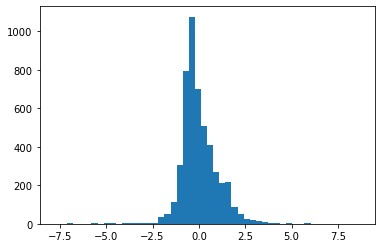

In [6]:
plt.hist(train_set.y, bins=50)
plt.show()

In [ ]:
from sklearn.preprocessing import Binarizer
import numpy as np

original_y = train_set.y_scaler.inverse_transform(train_set.y)
categorized_y = Binarizer(threshold=1.).fit_transform(original_y.reshape(-1, 1)).reshape(original_y.shape) # 0 => Stabilizing or neutral, 1 Destabilizing
categorized_y = np.where(categorized_y <= 1, 1, 0) # 1 => Stabilizing or neutral, 0 => Destabilizing 

scaled_cat_y = train_set.y_scaler.transform(categorized_y.reshape(-1, 1)).reshape(original_y.shape)
train_set